<a href="https://colab.research.google.com/github/hajonghyun/inflearn_ML_from_the_foundation/blob/main/4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---


# 선형회귀 이론 및 실습 # 4_1


---
---



## velog 주소

https://velog.io/@changhtun1/python-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

## 유튜브 주소

https://youtu.be/OAg7vOFjVck?si=rPLVlwN58ZtPR1J3

## 연습 데이터 url

https://drive.google.com/drive/folders/149jcCyJFKKG5MFaPNWnYYqM2EkzgRz2P?usp=sharing


---
---


# 선형 회귀 모델

## 🧮 선형 회귀 모델 기본 정리

선형 회귀는 다음과 같은 가설 함수를 사용합니다:

$$
\hat{y} = X \theta
$$

-  \hat{y} : 예측값 (벡터)  
- \( X \): 입력 데이터 행렬 (샘플 수 \( m \), 특성 수 \( n \))  
- \( \theta \): 학습해야 할 파라미터 벡터 (\( n \times 1 \))

## 🎯 목적: 손실 함수 최소화

가장 일반적으로 사용하는 손실 함수는 평균제곱오차(MSE, Mean Squared Error)입니다:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m} \| X\theta - y \|^2
$$

---


# 선형 회귀 모델의 여러가지 최적화 방법

##📌 1. 정규 방정식 (Normal Equation)
🔧 핵심 원리
- 폐쇄형 수식(closed-form solution)을 이용하여 가중치를 한 번에 계산하는 방법.

- 수학적으로 손실 함수(예: MSE)를 최소화하는 해를 직접 구하는 방식.

💡 머신러닝 관점
- 데이터의 크기가 작거나 중간 규모일 때 빠르고 정확함.

- 행렬 연산(역행렬 계산)이 필요하므로 데이터 수가 많으면 계산 비용이 큼.

🧃 예시
- 마치 시험 문제를 푸는 공식이 있는 상황과 같아요.
- "2차 방정식을 풀어라" → 근의 공식에 숫자만 넣으면 답이 나오죠.
- 데이터도 적고 계산도 간단할 때 유리합니다.



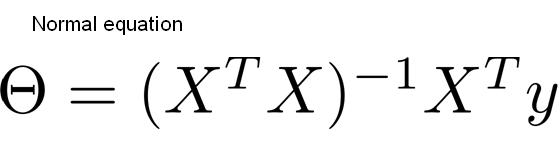


### ✅ 정규방정식 도출 과정

손실 함수 \( J(\theta) \)를 최소화하는 \( \theta \)를 찾기 위해 미분해서 0으로 놓고 풉니다.

1. 손실 함수:

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

2. 미분:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

3. 최소화 조건:

$$
X^T X \theta = X^T y
$$

---

### 🟨 최종 정규방정식 (Normal Equation)

정규방정식을 정리하면 다음과 같습니다:

$$
\boxed{\theta = (X^T X)^{-1} X^T y}
$$
---


### 🔍 예시: 키(신장)으로 몸무게 예측하기

| 사람 | 키(cm) | 몸무게(kg) |
|------|--------|------------|
| A    | 160    | 55         |
| B    | 170    | 65         |
| C    | 180    | 75         |

- \( X \) 행렬 (Bias Term 포함):

$$
X = \begin{bmatrix}
1 & 160 \\
1 & 170 \\
1 & 180
\end{bmatrix}, \quad
y = \begin{bmatrix}
55 \\
65 \\
75
\end{bmatrix}
$$

- 정규방정식에 대입:

1. \( X^T X \), \( X^T y \) 계산  
2. 역행렬 계산 → \( \theta = (X^T X)^{-1} X^T y \)

→ 최적의 \( \theta_0 \)(절편), \( \theta_1 \)(기울기) 값을 구할 수 있습니다!

---

### ⚠️ 정규방정식의 단점

- 역행렬 계산 필요 → 시간 복잡도 \( O(n^3) \)
- \( X^T X \)가 **역행렬을 가질 수 없는 경우**도 있음 (예: 다중공선성)
- 고차원 데이터셋에서는 **경사 하강법(Gradient Descent)**이 더 효율적임

---

### bias term이란?
선형 회귀(linear regression)는 종속 변수 \( y \)와 독립 변수 \( x \) 사이의 선형 관계를 모델링하는 기법입니다.  
기본 수식은 다음과 같습니다:

\[
y = w_1 x + b
\]

- \( w_1 \): 입력 \( x \)에 대한 가중치 (weight)  
- \( b \): 편향 항 (bias term, 절편)

여기서 **bias term \( b \)**는 데이터가 원점을 지나지 않아도 되는 자유도를 제공합니다.  
예를 들어, 키가 0cm인 사람이 체중이 0kg이어야 할 이유는 없습니다.  
그래서 **bias term은 꼭 필요합니다.**

그런데 이 모델을 **행렬로 계산하려면** 문제가 하나 생깁니다.

\[
y = Xw + b
\]

이렇게 계산하면 bias term \( b \)가 벡터 형태로 분리돼 있어 계산이 불편합니다.  
→ 그래서 \( b \)를 포함할 수 있도록 입력 \( X \)에 **1로 이루어진 열**을 추가합니다.

즉, 새로운 모델은 이렇게 됩니다:

\[
X' =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix},


w' =
\begin{bmatrix}
b \\
w_1
\end{bmatrix}
\quad \Rightarrow \quad
y = X' w'
\]


**1을 추가하는 이유**는 모든 샘플에 동일한 상수를 곱해서  
**bias term을 모델 내에서 일관되게 곱셈 연산으로 처리하기 위함입니다.**


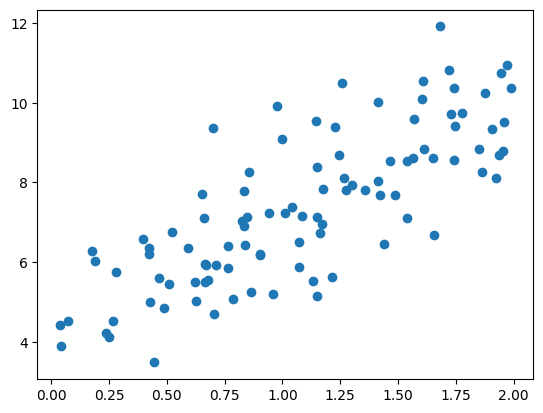

In [12]:
# 정규방정식 실습

# 0. x,y 데이터 값 만들고 scatter로 시각화하기


import matplotlib.pyplot as plt
import numpy as np

x = 2*np.random.rand(100,1) # 0~2 사이의 균일분포 => shape: 100*1
y = 4 + 3*x + np.random.randn(100,1) # 정규분포 => shape: 100*1

plt.scatter(x,y)
plt.show()


In [14]:
# 1. bias term 추가하기
bias_term = np.ones((100,1))
x_b = np.c_[bias_term,x]
x_b

array([[1.        , 1.53986267],
       [1.        , 1.61090996],
       [1.        , 0.90172144],
       [1.        , 1.07034637],
       [1.        , 1.68018386],
       [1.        , 0.82496802],
       [1.        , 1.04260577],
       [1.        , 1.25599394],
       [1.        , 0.9574995 ],
       [1.        , 0.39760773],
       [1.        , 1.08370617],
       [1.        , 1.97263364],
       [1.        , 1.01243072],
       [1.        , 0.17535021],
       [1.        , 1.74315728],
       [1.        , 0.69836568],
       [1.        , 1.41403599],
       [1.        , 0.59035713],
       [1.        , 0.44370204],
       [1.        , 0.52082217],
       [1.        , 0.48883865],
       [1.        , 1.16408228],
       [1.        , 0.42850325],
       [1.        , 1.14948101],
       [1.        , 1.27640948],
       [1.        , 0.6767991 ],
       [1.        , 0.844614  ],
       [1.        , 1.24383   ],
       [1.        , 1.42341795],
       [1.        , 0.83342066],
       [1.

In [20]:
# 1. bias term 추가하기2
bias_term = np.ones((100,1))
x_b = np.column_stack((bias_term,x))
x_b

array([[1.        , 1.53986267],
       [1.        , 1.61090996],
       [1.        , 0.90172144],
       [1.        , 1.07034637],
       [1.        , 1.68018386],
       [1.        , 0.82496802],
       [1.        , 1.04260577],
       [1.        , 1.25599394],
       [1.        , 0.9574995 ],
       [1.        , 0.39760773],
       [1.        , 1.08370617],
       [1.        , 1.97263364],
       [1.        , 1.01243072],
       [1.        , 0.17535021],
       [1.        , 1.74315728],
       [1.        , 0.69836568],
       [1.        , 1.41403599],
       [1.        , 0.59035713],
       [1.        , 0.44370204],
       [1.        , 0.52082217],
       [1.        , 0.48883865],
       [1.        , 1.16408228],
       [1.        , 0.42850325],
       [1.        , 1.14948101],
       [1.        , 1.27640948],
       [1.        , 0.6767991 ],
       [1.        , 0.844614  ],
       [1.        , 1.24383   ],
       [1.        , 1.42341795],
       [1.        , 0.83342066],
       [1.

In [19]:
# 1. bias term 추가하기3
bias_term = np.ones((100,1))
x_b = np.concatenate((bias_term,x),axis=1)
x_b

array([[1.        , 1.53986267],
       [1.        , 1.61090996],
       [1.        , 0.90172144],
       [1.        , 1.07034637],
       [1.        , 1.68018386],
       [1.        , 0.82496802],
       [1.        , 1.04260577],
       [1.        , 1.25599394],
       [1.        , 0.9574995 ],
       [1.        , 0.39760773],
       [1.        , 1.08370617],
       [1.        , 1.97263364],
       [1.        , 1.01243072],
       [1.        , 0.17535021],
       [1.        , 1.74315728],
       [1.        , 0.69836568],
       [1.        , 1.41403599],
       [1.        , 0.59035713],
       [1.        , 0.44370204],
       [1.        , 0.52082217],
       [1.        , 0.48883865],
       [1.        , 1.16408228],
       [1.        , 0.42850325],
       [1.        , 1.14948101],
       [1.        , 1.27640948],
       [1.        , 0.6767991 ],
       [1.        , 0.844614  ],
       [1.        , 1.24383   ],
       [1.        , 1.42341795],
       [1.        , 0.83342066],
       [1.

✅ np.c_와 비슷한 역할을 하면서 더 범용성 있는 함수들
1. np.column_stack() – 가장 비슷하면서도 명확한 함수
```python
np.column_stack((a, b))
```
np.c_[a, b]와 거의 동일한 동작을 해.

1차원 배열을 **자동으로 열벡터(2D)**로 바꾼 뒤, 옆으로 붙여줌.

문법도 함수 스타일이라 코드 리뷰에서 이해하기 쉽고, 가독성이 좋음.

2. np.concatenate() – 범용성 가장 높음
```python
np.concatenate([a, b], axis=1)
```
다양한 방향으로 붙일 수 있고, 1차원 이상부터 지원함.

단점: 1차원 배열은 자동으로 2차원으로 바꿔주지 않음 → 직접 reshape 해야 함.

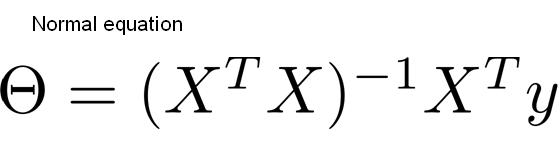

In [22]:
# 2. 정규방정식으로 theta best 구하기 (y = X*(theta)에서 데이터들을 가장 잘 표현하는 가중치 theta 구하기)

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.32262648],
       [2.8138361 ]])

### ✅ 벡터 내적 vs 행렬 곱: 개념 차이

🟢 벡터 내적 (dot product)

```
a = [a₁, a₂],    b = [b₁, b₂]

a · b = a₁·b₁ + a₂·b₂ = 스칼라
```

즉, 두 벡터의 **유사도** 또는 **투영 관계**를 측정하는 연산이야.  
👉 `np.dot(a, b)`에서 `a`, `b`가 둘 다 1차원일 때, 이게 수행돼.

---

🟢 행렬 곱 (matrix multiplication)

```
C = A · B   (단, A는 (m×n), B는 (n×p))
```

→ 결과는 `(m×p)` 크기의 행렬  
👉 `np.dot(A, B)`에서 `A`와 `B`가 2D일 때 사용됨.


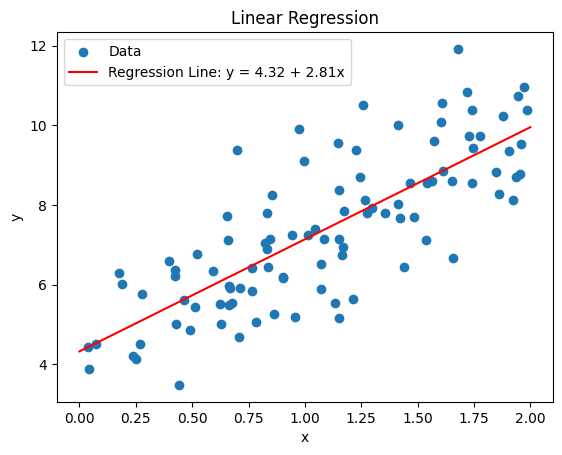

In [23]:
# prompt: 위에서 구한 theat best로 선형회귀를 완료한 일차함수를 그려줘

import matplotlib.pyplot as plt
import numpy as np

# Assuming theta_best is already calculated as in the provided code
# If not, uncomment the following lines and run them first:
# x = 2*np.random.rand(100,1)
# y = 4 + 3*x + np.random.randn(100,1)
# bias_term = np.ones((100,1))
# x_b = np.c_[bias_term,x]
# theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Extract theta_0 (intercept) and theta_1 (slope)
theta_0 = theta_best[0, 0]
theta_1 = theta_best[1, 0]

# Create the line based on theta_best
x_line = np.linspace(0, 2, 100)  # Create 100 points between 0 and 2
y_line = theta_0 + theta_1 * x_line

# Plot the data points and the regression line
plt.scatter(x, y, label='Data')
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {theta_0:.2f} + {theta_1:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

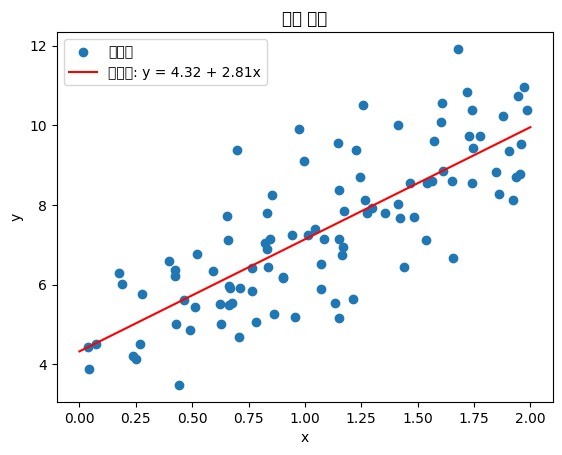

In [24]:
# theta_0 (절편)과 theta_1 (기울기) 추출
theta_0 = theta_best[0, 0]
theta_1 = theta_best[1, 0]

# x 좌표 0과 2에 대한 y 값 계산
x_line = np.array([0, 2])
y_line = theta_0 + theta_1 * x_line

# 데이터 점과 회귀선 그리기
plt.scatter(x, y, label='데이터')
plt.plot(x_line, y_line, color='red', label=f'회귀선: y = {theta_0:.2f} + {theta_1:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀')
plt.legend()
plt.show()

## 📌2. sklearn 패키지를 사용해서 theta best 네줄만에 만들기

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.32262648] [[2.8138361]]
